In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#### DATA FRAME in pandas #####
df = pd.DataFrame(data.data,columns=data.feature_names)
df2 = pd.DataFrame(data.target,columns=['target'])
final_dataset = pd.concat([df,df2],axis=1)
final_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Dropping highly correlated columns#
final_dataset = final_dataset.drop(['area error',
    'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst texture'                                  
], axis=1)

In [4]:
X = final_dataset.drop(['target'], axis= 1)
y= final_dataset['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled= sm.fit_transform(X_train)
X_test_scaled= sm.transform(X_test)

In [5]:
# Model building #

from sklearn.ensemble import ExtraTreesRegressor
ex= ExtraTreesRegressor()
ex.fit(X_train_scaled, y_train)

ExtraTreesRegressor()

In [6]:
ex.feature_importances_

array([0.23983832, 0.03492209, 0.01584428, 0.06163062, 0.220082  ,
       0.00822362, 0.01452353, 0.0627416 , 0.00840689, 0.00860829,
       0.0149996 , 0.02181884, 0.01253375, 0.01054496, 0.01933294,
       0.02880046, 0.04675305, 0.1377989 , 0.02145852, 0.01113775])

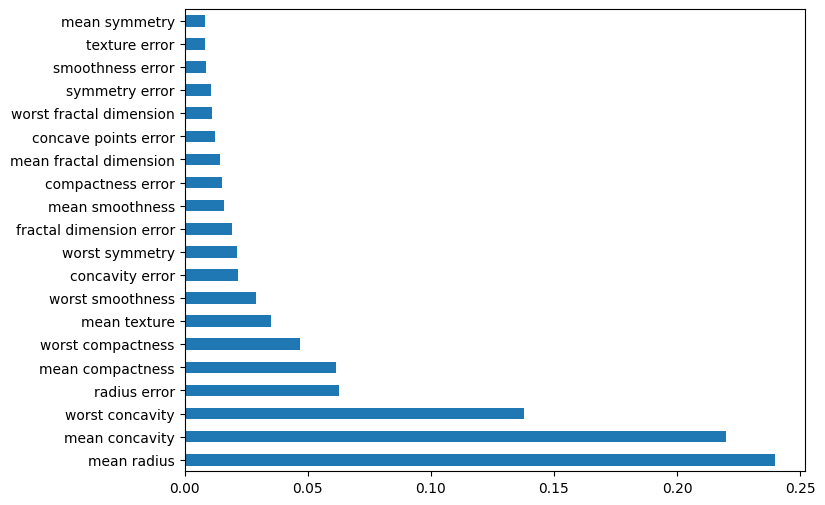

In [7]:
plt.figure(figsize= (8,6))
feat_importances= pd.Series(ex.feature_importances_, index= X_train.columns)
feat_importances.nlargest(30).plot(kind= 'barh')
plt.show()

# Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
ex_decision= DecisionTreeClassifier()
ex_decision.fit(X_train_scaled, y_train)
y_pred= ex_decision.predict(X_test_scaled)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        63
           1       0.88      0.91      0.89       108

    accuracy                           0.87       171
   macro avg       0.86      0.85      0.85       171
weighted avg       0.86      0.87      0.86       171

[[50 13]
 [10 98]]
accuracy is: 0.8654970760233918


# Decision Tree classifier with Grid Search CV

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 15)}

# Decision Tree Model
dtree_model= DecisionTreeClassifier()
dtree_gscv= GridSearchCV(dtree_model, param_grid, cv= 10)
dtree_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [11]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [12]:
# Model Building #

ex_decision1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)
ex_decision1.fit(X_train_scaled, y_train)
y_pred = ex_decision1.predict(X_test_scaled)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

[[ 59   4]
 [  7 101]]
accuracy is: 0.935672514619883
